# Airbnb Listing Prices in Downtown Vancouver vs. Downtown Toronto

## Introduction

<span class="tex2jax_ignore">Short-term rental (STR) listings on Airbnb are largely concentrated within metropolitan areas, with Toronto and Vancouver having the highest Airbnb rates in the country on average<sup>1, 2</sup>. Centrality, or the distance of a unit to the City Hall, appears to have a significant impact on the pricing of listings in major Canadian cities<sup>2</sup>. While one study found the mean Airbnb rates of Vancouver to be about $20 higher than Toronto, both cities also had a large degree of variation with standard deviations above $60 per night<sup>2</sup>. For every additional kilometer away from City Hall, Vancouver and Toronto listing prices also seem to be impacted to the same extent with price decreases of about 3.5%<sup>2</sup>. To identify if centrality has an impact on price, we aim to determine if the pricing of Airbnb listings in the downtown regions of Toronto and Vancouver are significantly different.</span>

To define the downtown regions, we are selecting listings in “Downtown” from the Vancouver dataset and neighbourhoods identified in Figure 1 from the Toronto dataset. These were investigated because of their proximity to each location's City Hall, which is a method commonly used in hedonic pricing models for accommodation<sup>2</sup>. We intend to use this to control for the variability; by specifying our area of interest, we can see whether centrality has the greatest impact on price or if there may be more significant factors involved.

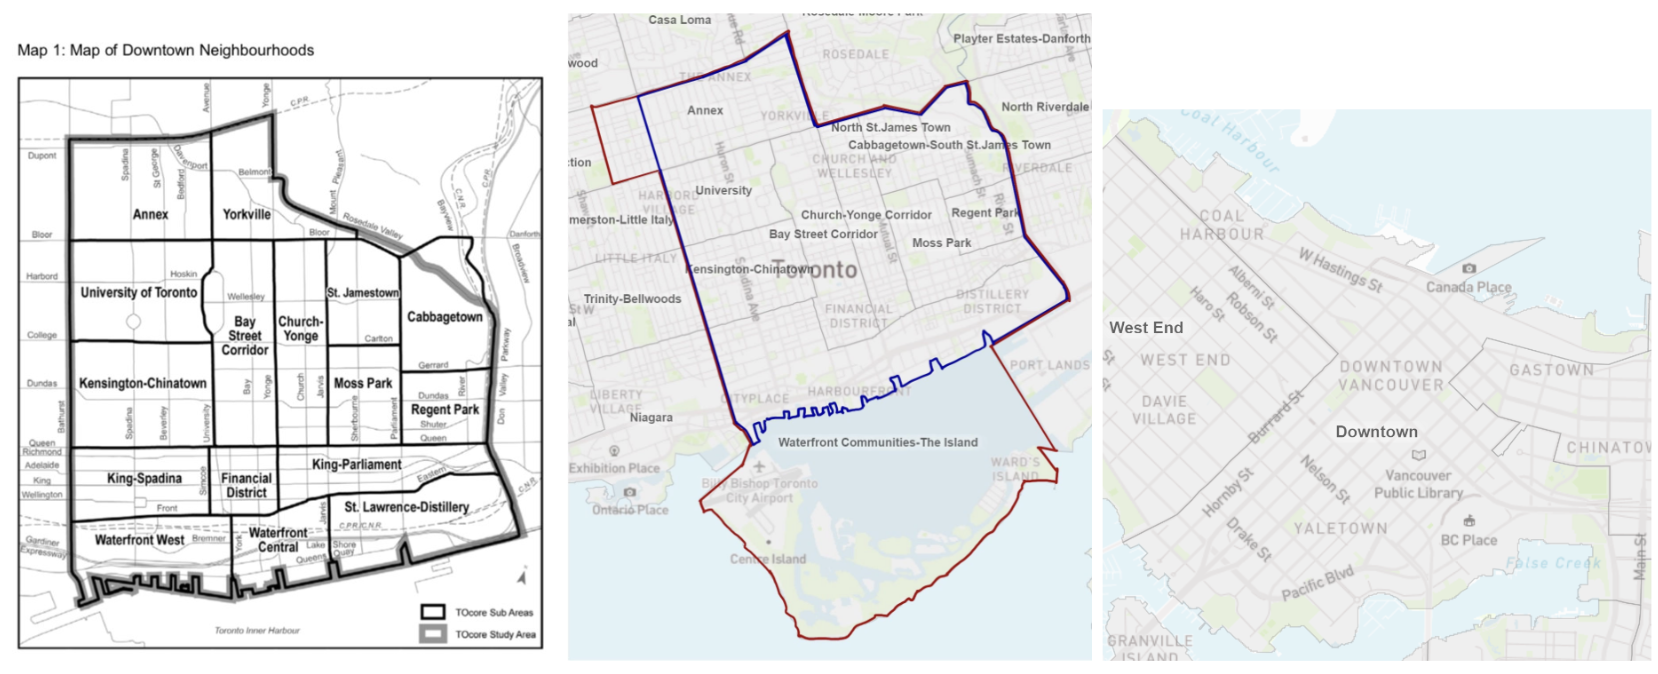

**Figure 1**. Downtown neighbourhoods designated by the City of Toronto (left); Map of Toronto provided by Inside Airbnb (middle); Map of Vancouver provided by Inside Airbnb (right). On the middle map: blue outlines the geographical area of the left map, red outlines our accepted neighbourhoods. From _TOcore: Downtown Plan official Plan Amendment_, by the Planning and Growth Management Committee, May 22, 2018. (http://app.toronto.ca/tmmis/viewAgendaItemHistory.do?item=2018.PG29.4)

We will merge two datasets from Inside Airbnb, a third-party data repository, that contain information about listings in Vancouver and Toronto scraped in July 2021<sup>3, 4</sup>. Our columns of interest include ‘neighbourhood’ and ‘price’. We plan to calculate the medians and interquartile ranges (IQR) for each city as these variables are less sensitive to outliers and provide higher accuracy when the data is skewed (Figure 3).

Vancouver’s average price was higher than Toronto’s; however, Vancouver had a higher standard deviation than Toronto<sup>2</sup>. Due to the large overlap between each city’s pricing distributions, we cannot be certain that this difference is significant. Centrality has been found to affect prices in both cities similarly, which leads us to believe that each downtown region should experience similar variations in price. 

## Methods and Results

In [1]:
library(tidyverse)
library(infer)
library(cowplot)

── Attaching packages ─────────────────────────────────────── tidyverse 1.3.2 ──
✔ ggplot2 3.3.6     ✔ purrr   0.3.4
✔ tibble  3.1.8     ✔ dplyr   1.0.9
✔ tidyr   1.2.0     ✔ stringr 1.4.1
✔ readr   2.1.2     ✔ forcats 0.5.2
── Conflicts ────────────────────────────────────────── tidyverse_conflicts() ──
✖ dplyr::filter() masks stats::filter()
✖ dplyr::lag()    masks stats::lag()


First, the Toronto and Vancouver listing datasets were read from the Inside Airbnb website.

In [2]:
set.seed(543)

# Read in Vancouver and Toronto Airbnb datasets

van_all_data <- read_csv("http://data.insideairbnb.com/canada/bc/vancouver/2021-07-06/visualisations/listings.csv")
toronto_all_data <- read_csv("http://data.insideairbnb.com/canada/on/toronto/2021-07-04/visualisations/listings.csv")
head(van_all_data) 
head(toronto_all_data)

Rows: 4330 Columns: 16
── Column specification ────────────────────────────────────────────────────────
Delimiter: ","
chr   (4): name, host_name, neighbourhood, room_type
dbl  (10): id, host_id, latitude, longitude, price, minimum_nights, number_o...
lgl   (1): neighbourhood_group
date  (1): last_review

ℹ Use `spec()` to retrieve the full column specification for this data.
ℹ Specify the column types or set `show_col_types = FALSE` to quiet this message.
Rows: 15298 Columns: 16
── Column specification ────────────────────────────────────────────────────────
Delimiter: ","
chr   (4): name, host_name, neighbourhood, room_type
dbl  (10): id, host_id, latitude, longitude, price, minimum_nights, number_o...
lgl   (1): neighbourhood_group
date  (1): last_review

ℹ Use `spec()` to retrieve the full column specification for this data.
ℹ Specify the column types or set `show_col_types = FALSE` to quiet this message.


id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365
<dbl>,<chr>,<dbl>,<chr>,<lgl>,<chr>,<dbl>,<dbl>,<chr>,<dbl>,<dbl>,<dbl>,<date>,<dbl>,<dbl>,<dbl>
10080,D1 - Million Dollar View 2 BR,30899,Rami,NA,Downtown,49.28872,-123.1205,Entire home/apt,150,90,16,2015-09-06,0.28,41,339
13358,Monthly (or Longer ) Designer One Bedroom Downtown,52116,Lynn,NA,West End,49.28201,-123.1267,Entire home/apt,85,30,430,2019-08-04,4.35,1,61
13490,Vancouver's best kept secret,52467,Iris,NA,Kensington-Cedar Cottage,49.25622,-123.0661,Entire home/apt,140,30,89,2020-10-31,4.03,1,195
14267,EcoLoft Vancouver,56030,Peter & Alison,NA,Kensington-Cedar Cottage,49.24922,-123.0814,Entire home/apt,150,3,33,2017-07-28,0.57,1,2
16254,Close to PNE/Hastings Park Garden level suite,63238,Jason,NA,Hastings-Sunrise,49.27721,-123.0409,Entire home/apt,195,3,5,2018-08-26,0.14,1,310
16611,"1 block to skytrain station, shops,restaurant,bank",58512,Q,NA,Grandview-Woodland,49.26339,-123.0714,Entire home/apt,100,30,3,2018-02-16,0.07,5,89


id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365
<dbl>,<chr>,<dbl>,<chr>,<lgl>,<chr>,<dbl>,<dbl>,<chr>,<dbl>,<dbl>,<dbl>,<date>,<dbl>,<dbl>,<dbl>
1419,Beautiful home in amazing area!,1565,Alexandra,NA,Little Portugal,43.64590,-79.42423,Entire home/apt,469,28,7,2017-12-04,0.10,1,0
8077,Downtown Harbourfront Private Room,22795,Kathie & Larry,NA,Waterfront Communities-The Island,43.64080,-79.37673,Private room,93,180,169,2013-08-27,1.57,2,365
23691,Queen Bedroom close to downtown,93825,Yohan & Sarah,NA,Briar Hill-Belgravia,43.69805,-79.45411,Private room,72,28,217,2018-10-10,1.80,2,364
27423,Executive Studio Unit- Ideal for One Person,118124,Brent,NA,South Riverdale,43.66884,-79.32725,Entire home/apt,45,365,26,2011-06-25,0.22,1,126
28160,"Safe, Central, Quiet and Great Amenities!",86838,Rita,NA,Mount Pleasant West,43.69958,-79.38814,Entire home/apt,75,30,7,2018-10-17,0.10,1,339
30931,Downtown Toronto - Waterview Condo,22795,Kathie & Larry,NA,Waterfront Communities-The Island,43.64015,-79.37625,Entire home/apt,123,180,1,2010-08-11,0.01,2,365


We filtered the datasets to only contain the neighbourhoods defined by our downtown definitions, combined them, and calculated the medians and interquartile ranges of listing prices for each city’s downtown sample.

In [3]:
# Create list of Airbnb neighbourhoods we will consider to comprise Downtown Toronto

downtown_toronto_neighbourhoods <- c("Annex", "University", "Kensington-Chinatown", "Regent Park",
                                     "Cabbagetown-South St.James Town","North St.James Town",
                                     "Bay Street Corridor", "Church-Yonge Corridor", "Moss Park",
                                     "Waterfront Communities-The Island")

# Filter listings for those in the downtown region, and extract the price column

van_listings <- van_all_data %>%
    filter(neighbourhood == "Downtown") %>%
    select(price) %>%
    mutate(city = "Vancouver")

toronto_listings <- toronto_all_data %>%
    filter(neighbourhood %in% downtown_toronto_neighbourhoods) %>%
    select(price) %>%
    mutate(city = "Toronto")

# Create a data frame of prices of downtown listings from both cities
listings <- van_listings %>%
    rbind(toronto_listings) %>%
    mutate(city = as.factor(city))

In [4]:
# Compute the median and IQR of prices in each city

listings_sample_estimates <- listings %>%
    group_by(city) %>%
    summarize(median = median(price),
              iqr = IQR(price),
              quartile_1 = quantile(price, 0.25),
              quartile_3 = quantile(price, 0.75),
              n = n())

'Table 1. Median, interquartile range, first quartile, and third quartile of nightly prices for Airbnb listings in downtown Toronto and Vancouver. n = number of listings in each region.'
listings_sample_estimates

[1] "Table 1. Median, interquartile range, first quartile, and third quartile of nightly prices for Airbnb listings in downtown Toronto and Vancouver. n = number of listings in each region."

city,median,iqr,quartile_1,quartile_3,n
<fct>,<dbl>,<dbl>,<dbl>,<dbl>,<int>
Toronto,129,109,90,199,5544
Vancouver,154,132,108,240,1170


We constructed histograms to visualize the shapes of the distributions and created boxplots to compare the medians and IQRs of each region. 

`stat_bin()` using `bins = 30`. Pick better value with `binwidth`.

Warning message:
“Removed 110 rows containing non-finite values (stat_bin).”
Warning message:
“Removed 4 rows containing missing values (geom_bar).”
Warning message:
“Removed 110 rows containing non-finite values (stat_boxplot).”


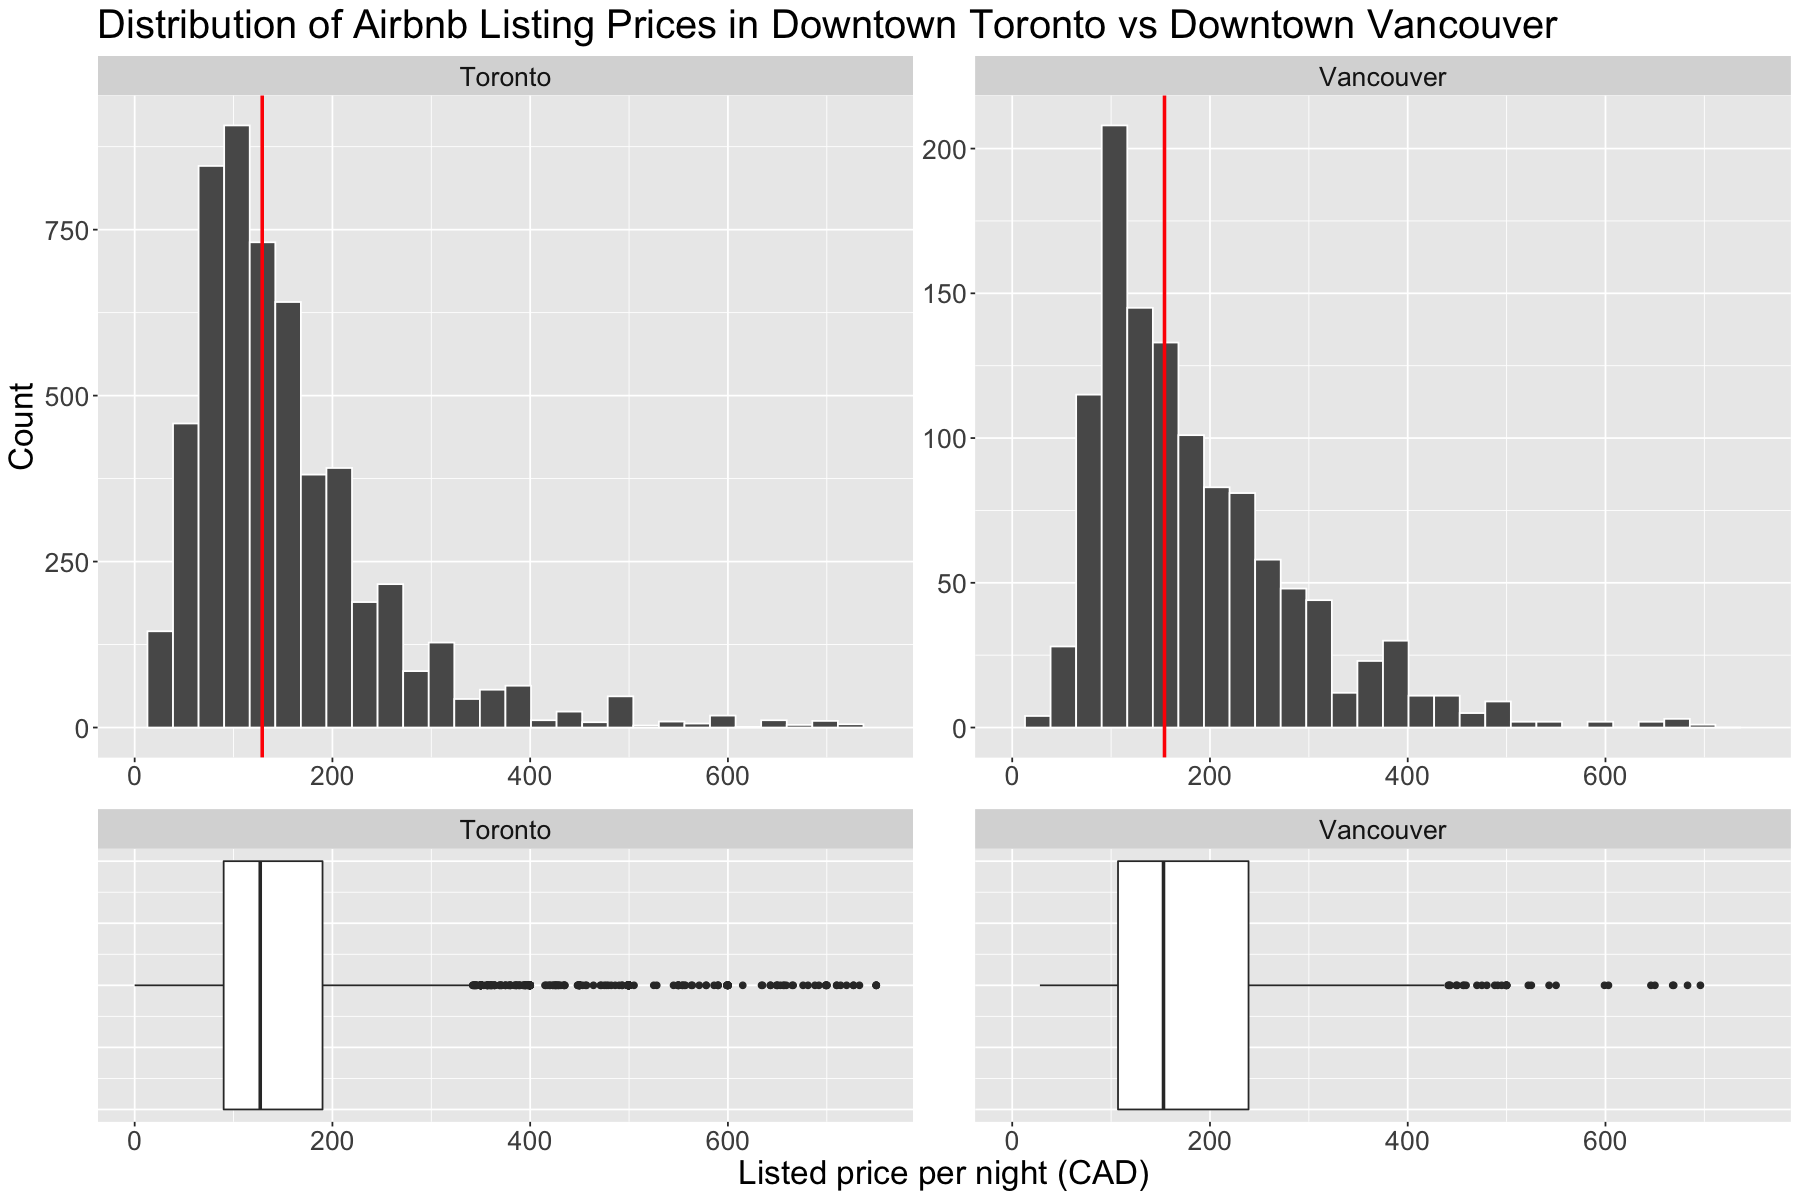

In [5]:
options(repr.plot.width = 15, repr.plot.height = 10)

# Compare the distribution of prices for the two cities

price_dists <- listings %>%
    ggplot(aes(x = price)) +
        geom_histogram(colour = "white") +
        labs(y = "Count") +
        xlim(0, 750) +
        geom_vline(data = listings_sample_estimates, aes(xintercept = median), colour = "red", size = 1) +
        facet_wrap(~city, scales = "free") +
        ggtitle("Distribution of Airbnb Listing Prices in Downtown Toronto vs Downtown Vancouver") +
        theme(text = element_text(size = 20),
             axis.title.x = element_blank())

# Compare medians and IQRs of each region with boxplots 

price_boxplots <- listings %>%
    ggplot(aes(x = price)) +
        geom_boxplot(aes(y = 100), width = 4) +        # creates the right amount of vertical spacing to align with histograms
        xlim(0, 750) +
        facet_wrap(~city, scales = "free") +
        labs(x = "Listed price per night (CAD)") +
        theme(text = element_text(size = 20),
              axis.ticks.y = element_blank(),
              axis.text.y = element_text(colour = "white"),
              axis.title.y = element_blank())

plot_grid(price_dists, price_boxplots,
          ncol = 1, rel_heights = c(2, 1),
          align = 'v', axis = 'lr')

**Figure 2**. Nightly prices of Airbnb listings in downtown Toronto (left) and Vancouver (right). The median price for each city is shown in red, and the interquartile ranges are shown in boxplots of identical scale (below). Actual prices in the sample range up to $13,000/night, so x-bounds are limited for visibility.

<span class="tex2jax_ignore">
    The distributions of price in both cities are positively skewed (Figure 2). The estimated median nightly price is $25 higher in Vancouver's listings than Toronto's. In Vancouver, the middle 50% of prices fall between $108 and $240, compared to $90 and $199 in Toronto, making the IQR for downtown Vancouver listings greater by $23 (Table 1).
</span>

As downtown Toronto and Vancouver’s listing prices exhibit a large overlap, it is uncertain whether the $25 difference in medians originates from a real effect or sampling variation.

To better understand the uncertainty in our estimates, we calculated 95% confidence intervals for the IQR of price in both Vancouver and Toronto using 2000 bootstrap samples. Since the bootstrap distribution of sample IQRs may not be normally shaped, we applied the percentile method for confidence intervals.

We graphed each bootstrap distribution with its 95% confidence interval to visualize the difference between each city's sample IQRs. 

In [6]:
# Generate bootstrap distribution for Vancouver median

van_bootstrap_dist <- van_listings %>%
    specify(response = price) %>%
    generate(reps = 2000, type = "bootstrap") %>%
    summarize(sample_iqr = IQR(price))

# Calculate confidence interval for Vancouver median

van_iqr_ci <- van_bootstrap_dist %>%
    summarize(lower_ci = quantile(sample_iqr, 0.025),
              upper_ci = quantile(sample_iqr, 0.975))

# Generate bootstrap distribution for Toronto median

toronto_bootstrap_dist <- toronto_listings %>%
    specify(response = price) %>%
    generate(reps = 2000, type = "bootstrap") %>%
    summarize(sample_iqr = IQR(price))

# Calculate confidence interval for Toronto median

toronto_iqr_ci <- toronto_bootstrap_dist %>%
    summarize(lower_ci = quantile(sample_iqr, 0.025),
              upper_ci = quantile(sample_iqr, 0.975))

`stat_bin()` using `bins = 30`. Pick better value with `binwidth`.

`stat_bin()` using `bins = 30`. Pick better value with `binwidth`.



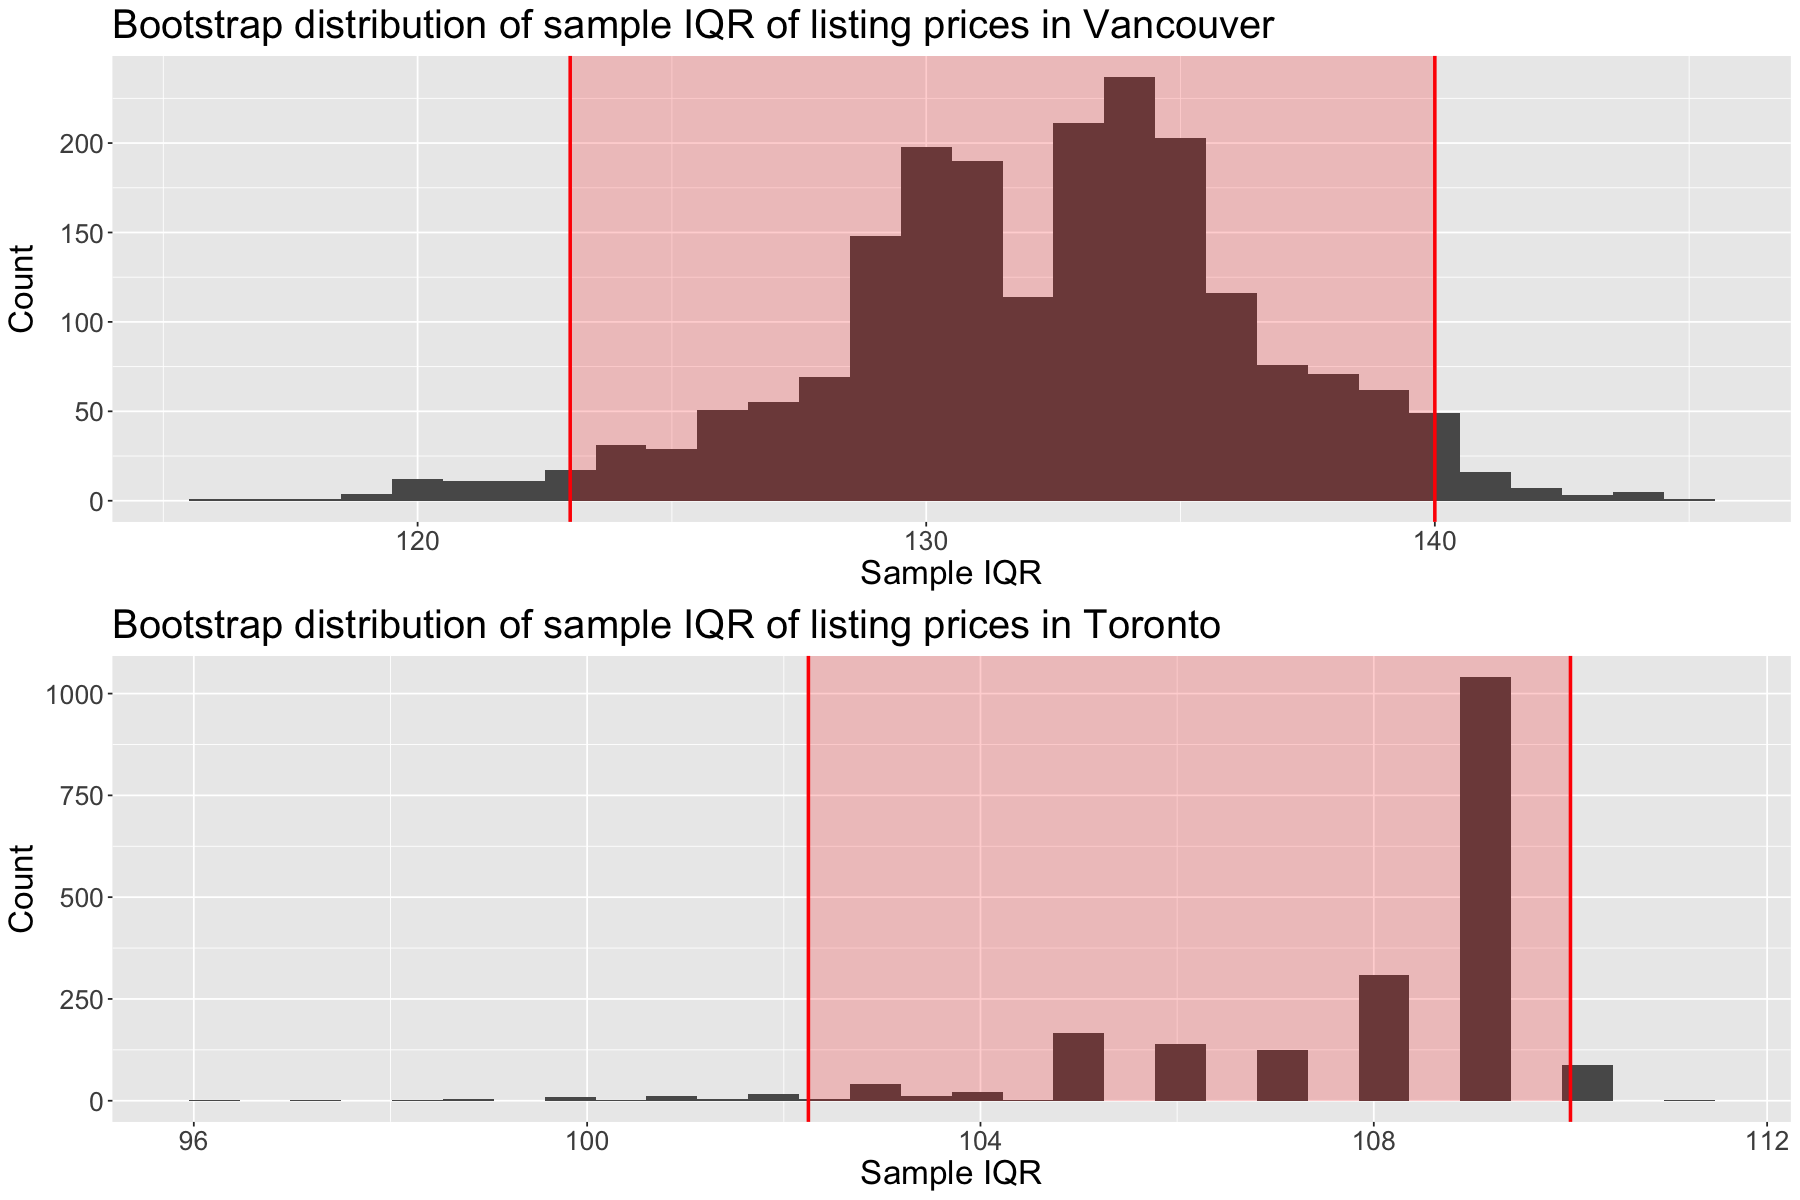

In [7]:
# Graph bootstrap distribution for Vancouver IQR

van_bootstrap_plot <- van_bootstrap_dist %>%
    ggplot() +
    geom_histogram(aes(x = sample_iqr)) +
    annotate("rect", xmin = van_iqr_ci$lower_ci[1], xmax = van_iqr_ci$upper_ci[1], ymin = 0, ymax = Inf,
              fill = "red",
              alpha = 0.2) +
    geom_vline(xintercept = van_iqr_ci$lower_ci[1], size = 1, colour = "red") +
    geom_vline(xintercept = van_iqr_ci$upper_ci[1], size = 1, colour = "red") +
    labs(x = "Sample IQR", y = "Count", title='Bootstrap distribution of sample IQR of listing prices in Vancouver') +
    theme(text = element_text(size = 20))

# Graph bootstrap distribution for Toronto IQR

toronto_bootstrap_plot <- toronto_bootstrap_dist %>%
    ggplot() +
    geom_histogram(aes(x = sample_iqr)) +
    annotate("rect", xmin = toronto_iqr_ci$lower_ci[1], xmax = toronto_iqr_ci$upper_ci[1], ymin = 0, ymax = Inf,
              fill = "red",
              alpha = 0.2) +
    geom_vline(xintercept = toronto_iqr_ci$lower_ci[1], size = 1, colour = "red") +
    geom_vline(xintercept = toronto_iqr_ci$upper_ci[1], size = 1, colour = "red") +
    labs(x = "Sample IQR", y = "Count", title='Bootstrap distribution of sample IQR of listing prices in Toronto') +
    theme(text = element_text(size = 20))

plot_grid(van_bootstrap_plot, toronto_bootstrap_plot, ncol = 1, align = 'v')

**Figure 3**. Bootstrap sampling distributions of sample IQR for Airbnb listing price in downtown Vancouver (above) and Toronto (below). Shaded regions represent the 95% confidence interval for each city.

In [8]:
# Tabulate confidence intervals

iqr_cis <- full_join(van_iqr_ci, toronto_iqr_ci) %>%
    mutate(city = c('Vancouver', 'Toronto'), .before = lower_ci)

'Table 2. 95% confidence intervals for interquartile range of listing prices in downtown Vancouver and Toronto calculated via bootstrapping.'
iqr_cis

Joining, by = c("lower_ci", "upper_ci")


[1] "Table 2. 95% confidence intervals for interquartile range of listing prices in downtown Vancouver and Toronto calculated via bootstrapping."

city,lower_ci,upper_ci
<chr>,<dbl>,<dbl>
Vancouver,123.00,140
Toronto,102.25,110


We are 95% confident that the interval (123.00, 140) contains the true IQR of listing price in downtown Vancouver, and 95% confident that the interval (102.25, 110) contains the true IQR of listing price in downtown Toronto.

As shown in Table 2, the bootstrap 95% confidence interval for Vancouver is wider than Toronto's, which suggests that the variability of prices in the former city is higher. Both 95% confidence intervals do not overlap, where Vancouver's lower bound is higher than Toronto's upper bound (Table 2); thus, there is a statistically significant difference in the true IQRs where the significance level is 0.05.

We tested the hypotheses $H_0: \tilde{x}_{Vancouver} - \tilde{x}_{Toronto} = 0$, and $H_A: \tilde{x}_{Vancouver} - \tilde{x}_{Toronto} \neq 0$, where $\tilde{x}$ represents the median, using a permutation test with 2000 resamples.

At a fixed significance level and effect size, the probability of committing a Type II error decreases for larger sample sizes. Given our sample size, it is likely that the probability of Type II error will be much smaller than Type I error. We wish to decrease the chance of falsely concluding that prices in the two downtown regions are different. Therefore, a stricter significance level $\alpha = 0.001$ was chosen.

In [9]:
# Calculate the observed test statistic

test_statistic_bootstrapping <- listings %>%
    specify(formula = price ~ city) %>%
    calculate(stat = "diff in medians", order = c("Vancouver", "Toronto")) %>%
    pull(stat)

# Test difference in medians using bootstrapping to produce the null distribution

listings_null_distribution <- listings %>%
    specify(formula = price ~ city) %>%
    hypothesize(null = "independence") %>%
    generate(reps = 2000, type = "permute") %>%
    calculate(stat = "diff in medians", order = c("Vancouver", "Toronto"))

# Get p-value of test

p_value_bootstrapping <- listings_null_distribution %>%
    get_p_value(obs_stat = test_statistic_bootstrapping, direction = "two-sided") %>%
    pull(p_value)

print(paste("Observed test statistic:", test_statistic_bootstrapping))
print(paste("p value:", p_value_bootstrapping))

Warning message:
“Please be cautious in reporting a p-value of 0. This result is an approximation based on the number of `reps` chosen in the `generate()` step. See `?get_p_value()` for more information.”


[1] "Observed test statistic: 25"
[1] "p value: 0"


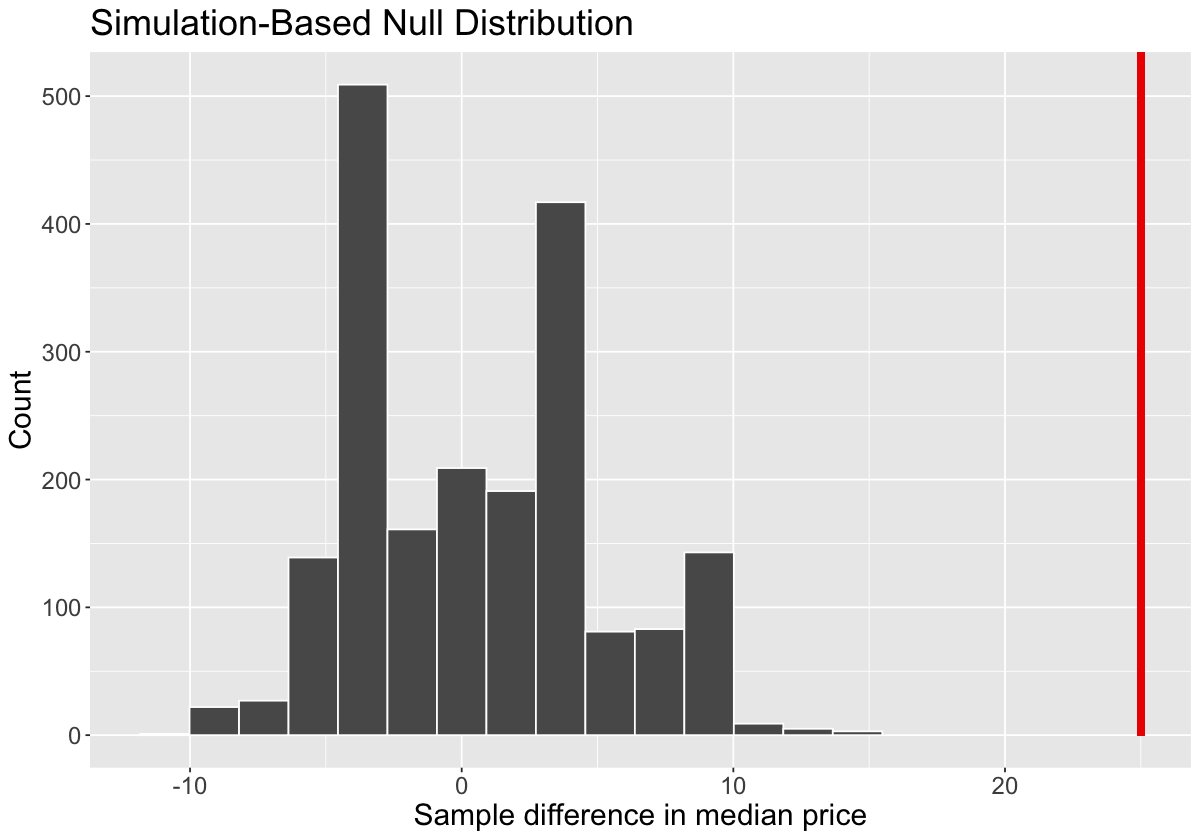

In [10]:
options(repr.plot.width = 10, repr.plot.height = 7)

# Do not shade
visualize(listings_null_distribution) +
    shade_p_value(obs_stat = test_statistic_bootstrapping, direction = NULL) +
    labs(x = "Sample difference in median price", y = "Count") +
    theme(text = element_text(size = 18))

**Figure 4.** Bootstrap null distribution of difference in sample median prices between downtown Vancouver and downtown Toronto Airbnb listings. Red line displays the observed test statistic.

The observed test statistic is 25, which produced an estimated p-value of 0. However, since the simulated null distribution consists of 2000 estimates, we can only conclude that none of the resampled differences in medians were more extreme than the observed test statistic and that the p-value is less than $\frac{1}{2000}$. This suggests that there is a difference between each city's median listing price and we should reject the null hypothesis in favour of the alternative hypothesis (p < 0.001). 

In addition, a confidence interval was constructed for the true difference in medians, using 2000 bootstrap samples and a 99.9% confidence level to correspond to the hypothesis test.

In [11]:
# Confidence interval for difference in medians

listings_bootstrap_dist <- listings %>%
    specify(formula = price ~ city) %>%
    generate(reps = 2000, type = "bootstrap") %>%
    calculate(stat = "diff in medians", order = c("Vancouver", "Toronto"))

listings_ci <- listings_bootstrap_dist %>%
    get_ci(level = 0.999, type = "percentile")

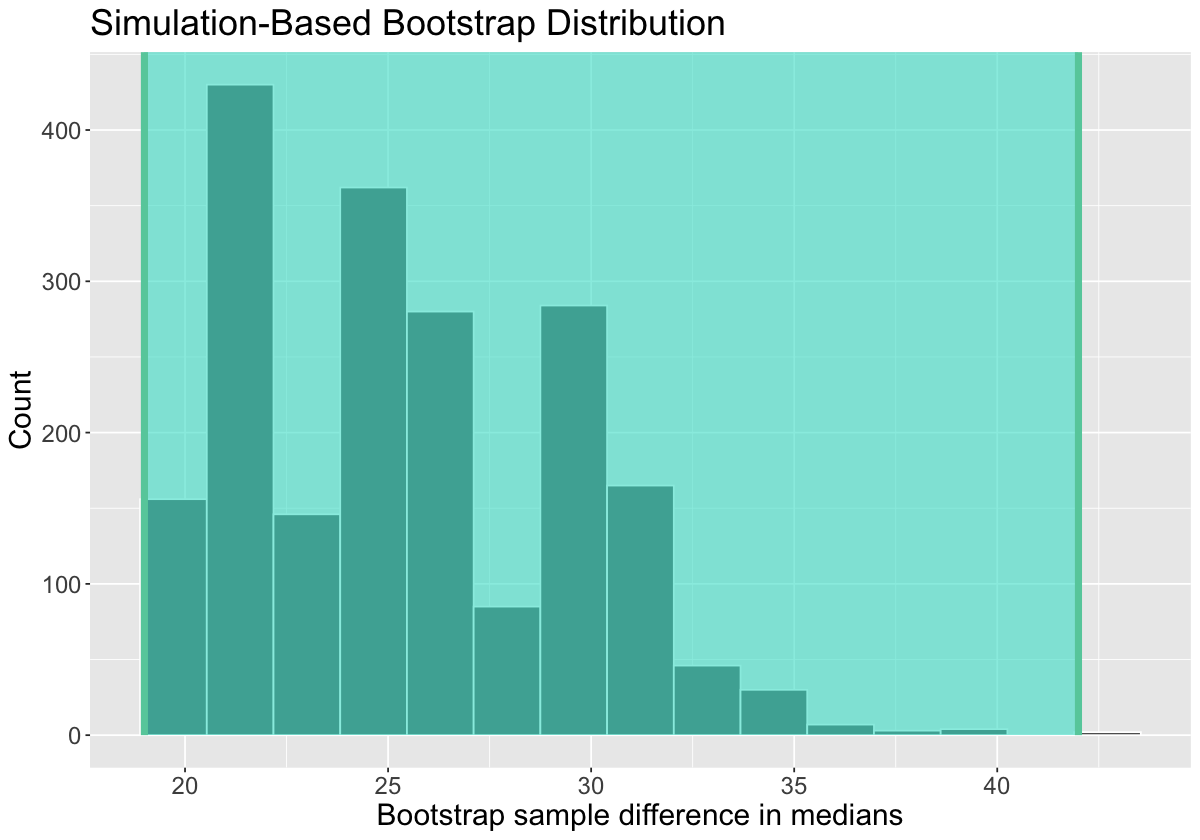

In [12]:
visualize(listings_bootstrap_dist) +
    shade_ci(endpoints = listings_ci) +
    labs(x = "Bootstrap sample difference in medians", y = "Count") +
    theme(text = element_text(size = 18))

**Figure 5.** Bootstrap distribution of difference in sample median prices between downtown Vancouver and downtown Toronto Airbnb listings. Shaded region represents the 99.9% confidence interval.

In [13]:
print(paste("Confidence interval: (",
            listings_ci$lower_ci[1], ",",
            listings_ci$upper_ci[1], ")"))

[1] "Confidence interval: ( 19 , 42 )"


Our 99.9% confidence interval for the bootstrap distribution allows us to state that we are 99.9% confident that the true difference in medians is found between (19, 42).

The 99.9% confidence interval does not include 0 (Figure 5), which suggests that a difference in medians equal to 0 does not exist in this range. This favours the alternative hypothesis that the median listing price for Airbnb listings in downtown Vancouver and downtown Toronto are different.

We also applied Mood’s median test, an asymptotic test that compares medians of independent samples, to assess the hypotheses $H_0:$ there is no difference between the median listing prices in downtown Vancouver and downtown Toronto, and $H_A:$ the median listing prices in downtown Vancouver and downtown Toronto are different.

Mood's median test works with non-parametric data that contains many outliers. It also requires samples that come from population distributions of the same shape. Based on the sample distributions (Figure 2), the population distributions are assumed to share a unimodal, right-skewed shape.

To perform Mood's median test, we found the overall median price among the two regions. A contingency table was created for the number of observations greater than and less than or equal to the overall median, and a chi-square test of independence was conducted.

In [14]:
# Compute overall median
overall_median <- listings %>%
    summarize(median = median(price)) %>%
    as.numeric()

# Create contingency table
contingency_table <- table(
    listings %>%
    mutate(comp = ifelse(price > overall_median, "greater", "less_equal")) %>%
    select(comp, city)
)

print(paste("Overall median is", overall_median))

'Table 3. Contingency table showing the number of listings from each city that are greater than, or less than or equal to, the overall median.'
contingency_table

[1] "Overall median is 132"


[1] "Table 3. Contingency table showing the number of listings from each city that are greater than, or less than or equal to, the overall median."

            city
comp         Toronto Vancouver
  greater       2638       713
  less_equal    2906       457

In [15]:
# Complete Mood's median test by performing a chi-square test on the contingency table

'Table 4. Chi-square test results on difference in median Airbnb listing prices in downtown Vancouver and Toronto.'
broom::tidy (
    chisq.test(contingency_table, correct = FALSE)
)

[1] "Table 4. Chi-square test results on difference in median Airbnb listing prices in downtown Vancouver and Toronto."

statistic,p.value,parameter,method
<dbl>,<dbl>,<int>,<chr>
68.94771,1.011088e-16,1,Pearson's Chi-squared test


The Mood's median test produced a p-value of 1.011088 × 10<sup>-16</sup> and a chi-square test-statistic of 68.94771 (Table 4). When the chi-square test statistic is 0, it means that the observed and expected values are the same, which is very rare. As our chi-square test statistic is much greater than 0, which is reflected by the p-value (p < 0.001), we reject the null hypothesis and can conclude that there is a difference between the median listing prices in downtown Vancouver and downtown Toronto.

For the hypothesis test, we used both bootstrapping and the Mood's median test for comparison. We believe that neither test is substantially more trustworthy and both produce reasonable results. As a non-parametric test, Mood's median test can produce a valid analysis even with skewed distributions. Similarly, bootstrapping does not rely on the shape of the sample distributions. Because our method focuses specifically on the median and the IQR, skewness and outliers should not impact the reliability of either test.

Given the difference in test procedures, bootstrapping and Mood's median test produced different p-values. Nevertheless, both p-values were less than our significance level and the null hypothesis was rejected. This similarity is reflected by how extreme the observed difference in sample medians is compared to the null distribution. Unfortunately, since bootstrapping only produced an estimated p-value of 0, we cannot state the exact p-value for comparison.

There are also external factors that may impact the interpretability of our analysis. We assumed the samples were random before conducting Mood’s median test. However, the procedures Inside Airbnb used to compile the dataset are unknown; if they were not obtained randomly, we will not be able to generalize our asymptotic results. Although non-parametric tests have lower statistical power compared to parametric tests and are less likely to detect an effect, we still found a significant difference between each downtown region.


## Discussion

#### Findings

We expected to find that listing prices of Vancouver and Toronto’s downtown regions would not be significantly different because Airbnb prices in both Vancouver and Toronto demonstrate large variations and have been found to be similarly impacted by centrality<sup>1, 2</sup>. Our results have revealed that this is not the case, as the median listing prices were significantly different between cities with an observed difference of $25 (p < 0.001) and therefore, are likely impacted by other factors aside from their proximity to City Hall. This suggests that Airbnb renters will not have the same likelihood of identifying similarly-priced listings in each downtown region and therefore, may need to consider which option best fits their budget.

The bootstrapped 95% confidence intervals for the IQRs of listing prices are (123.00, 140) for downtown Vancouver and (102.25, 110) for downtown Toronto. Although the median prices may be different, both endpoints of these intervals indicate large variation compared to the observed difference in medians. Since the lower bound of Vancouver’s confidence interval is higher than the upper bound of Toronto’s confidence interval, it is likely that prices in Vancouver have more variation. 

#### Strengths

Our samples should be representative of the populations of Airbnb listings in Vancouver and Toronto’s downtown regions across time as listing prices and the proportion of availability within the STR markets should not differ significantly from one year to another<sup>1</sup>. Moreover, since the sample size is large (Table 1), our estimates are more likely to be precise.

#### Impacts and Implications

These findings reflect the known disparities in the rental markets of each city, as the Canadian West Coast has substantially more empty units year-round compared to the Canadian East Coast<sup>2</sup>. This would support the higher median price estimate found for downtown Vancouver, as more people may not be able to afford renting in this area, thus leaving units unoccupied. The number of available listings in both downtown regions could also impact pricing, as Toronto had over 4000 more than Vancouver, and the higher supply, lower demand relationship to price could result in a lower median in comparison.

<span class="tex2jax_ignore">Despite the significant difference we determined, it is important to note that the difference in median price does not mean that all downtown listings in each city are uniquely priced. Our asymptotic test estimates inform us that we can be 99.9% confident that the median for listings in downtown Vancouver is $19-42 more per night compared to downtown Toronto, but the listings themselves are not necessarily $19-42 more per night. From our sample distributions, prices appear variable and likely overlap (Figure 2), therefore it is misleading to say that listings in one city are consistently higher just from observing our summary statistics. Similarly, we cannot confirm if the listings below the IQR in Vancouver are necessarily always more expensive than the listings above the IQR in Toronto. We also did not conduct a one-tailed hypothesis test to determine if downtown Vancouver's prices are significantly higher than Toronto's, so this directionality cannot be confirmed without further evidence.</span>

**COVID-19 implication**

As the data we used was scraped in July 2021, the COVID-19 pandemic may have impacted the Airbnb listing prices in downtown Vancouver and Toronto. Since Ontario has had stricter lockdown policies than British Columbia, fewer tourists may have visited Toronto compared to Vancouver. This impact of the pandemic on the travel industry could have led to fewer Airbnb bookings and increased competition between hosts, resulting in Toronto's lower median price.

#### Future Questions

1. Is downtown Vancouver’s median price of Airbnb listings significantly higher than downtown Toronto’s?
2. How do prices of Airbnb listings in downtown Vancouver and Toronto compare to other major cities, inside and outside of Canada?
3. What factors influence Airbnb prices in downtown Vancouver and Toronto?
4. Does the observed relationship in Airbnb prices hold for other forms of lodging, and between other (e.g. rural or suburban) locations?
5. How does the current COVID-19 pandemic impact the Airbnb prices in downtown Vancouver and Toronto, if there is an effect?

## References

<sup>1</sup> Combs, J., Kerrigan, D., & Wachsmuth, D. (2020). Short-term rentals in Canada: Uneven growth, uneven impacts. _Canadian Journal of Urban Research, 29_(1), 119–134. Retrieved from https://cjur.uwinnipeg.ca/index.php/cjur/article/view/274

<sup>2</sup> Gibbs, C., Guttentag, D., Gretzel, U., Morton, J., & Goodwill, A. (2017). Pricing in the sharing economy: A hedonic pricing model applied to airbnb listings. _Journal of Travel & Tourism Marketing, 35_(1), 46–56. doi:https://doi.org/10.1080/10548408.2017.1308292 

<sup>3</sup> Cox, M. (2021). _Toronto, Ontario, Canada_. [Data set]. Inside Airbnb Data. http://data.insideairbnb.com/canada/on/toronto/2021-07-04/visualisations/listings.csv

<sup>4</sup> Cox, M. (2021). _Vancouver, British Columbia, Canada_. [Data set]. Inside Airbnb Data. http://data.insideairbnb.com/canada/bc/vancouver/2021-07-06/visualisations/listings.csv

